# Single Source Shortest Path Problem
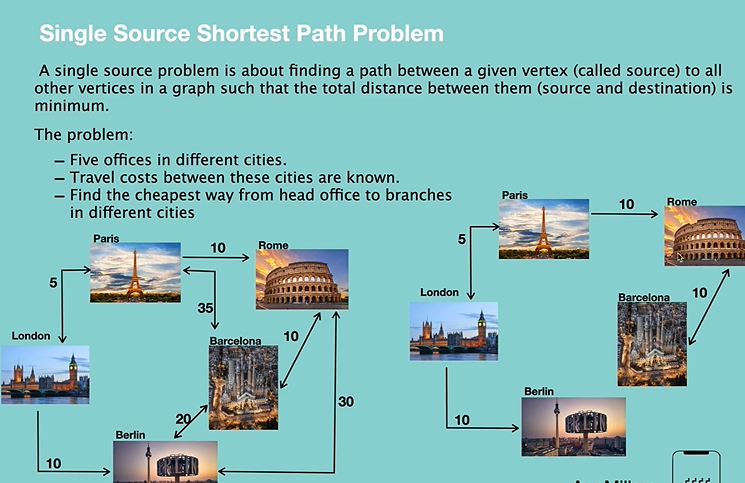

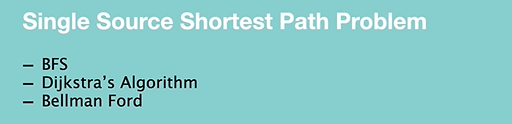

# BFS for SSSP (unweighted graph)
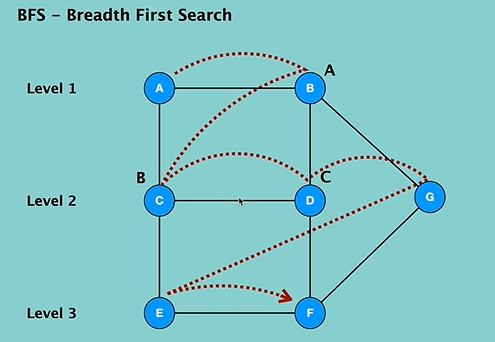

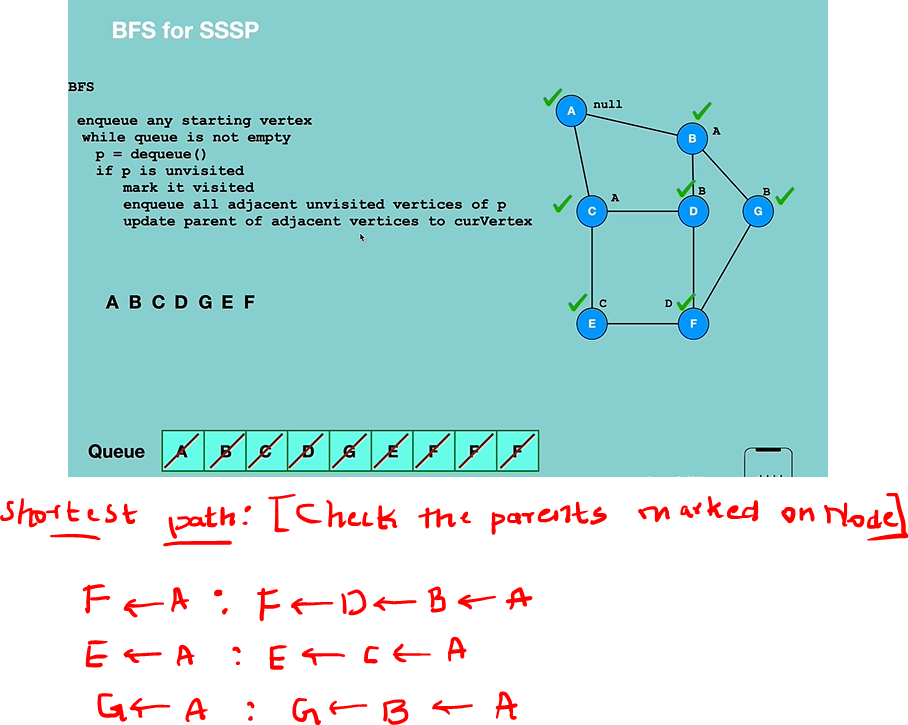
### Time Complexity :: $O(E)$ ,
> ### Because in SSSP we are only visiting the connected vertices and we are not visiting isolated vertices 
### Space Complexity :: $O(E)$

In [34]:
class Graph:
    def __init__(self, gdict=None):
        if gdict is None:
            gdict = {}
        self.gdict = gdict
    
    def bfs(self, start, end):
        print("start  : {} End : {}".format(start,end))
        queue = []
        queue.append([start])
        print("queue : ",queue)
        while queue:
            path = queue.pop(0)
            node = path[-1]
            print("path (queue.pop(0)) : {} node (path[-1]) : {}".format(path,node))
            if node == end:
                return path
            for adjacent in self.gdict.get(node, []):
                new_path = list(path)
                new_path.append(adjacent)
                print("new_path : ",new_path)
                queue.append(new_path)
                print("queue : ",queue)

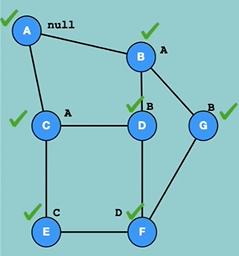

In [35]:
customDict = { "a" : ["b", "c"],
               "b" : ["d", "g"],
               "c" : ["d", "e"],
               "d" : ["f"],
               "e" : ["f"],
               "g" : ["f"]
            }

g = Graph(customDict)


In [3]:
print(g.bfs("a", "f"))

['a', 'b', 'd', 'f']


In [4]:
print(g.bfs("a", "e"))

['a', 'c', 'e']


In [5]:
print(g.bfs("a", "g"))

['a', 'b', 'g']


In [36]:
print(g.bfs("a", "f"))

start  : a End : f
queue :  [['a']]
path (queue.pop(0)) : ['a'] node (path[-1]) : a
new_path :  ['a', 'b']
queue :  [['a', 'b']]
new_path :  ['a', 'c']
queue :  [['a', 'b'], ['a', 'c']]
path (queue.pop(0)) : ['a', 'b'] node (path[-1]) : b
new_path :  ['a', 'b', 'd']
queue :  [['a', 'c'], ['a', 'b', 'd']]
new_path :  ['a', 'b', 'g']
queue :  [['a', 'c'], ['a', 'b', 'd'], ['a', 'b', 'g']]
path (queue.pop(0)) : ['a', 'c'] node (path[-1]) : c
new_path :  ['a', 'c', 'd']
queue :  [['a', 'b', 'd'], ['a', 'b', 'g'], ['a', 'c', 'd']]
new_path :  ['a', 'c', 'e']
queue :  [['a', 'b', 'd'], ['a', 'b', 'g'], ['a', 'c', 'd'], ['a', 'c', 'e']]
path (queue.pop(0)) : ['a', 'b', 'd'] node (path[-1]) : d
new_path :  ['a', 'b', 'd', 'f']
queue :  [['a', 'b', 'g'], ['a', 'c', 'd'], ['a', 'c', 'e'], ['a', 'b', 'd', 'f']]
path (queue.pop(0)) : ['a', 'b', 'g'] node (path[-1]) : g
new_path :  ['a', 'b', 'g', 'f']
queue :  [['a', 'c', 'd'], ['a', 'c', 'e'], ['a', 'b', 'd', 'f'], ['a', 'b', 'g', 'f']]
path (que

# Why BFS not work with weighted graph ?
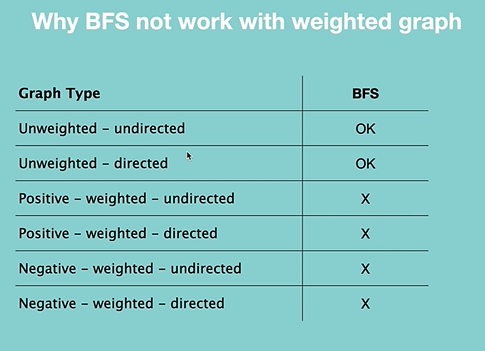

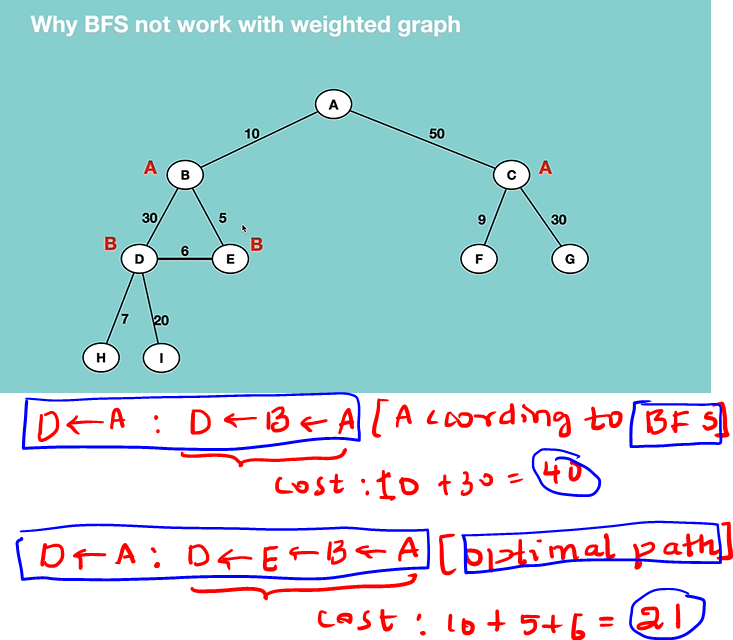

# Why DFS not work with SSSP ?
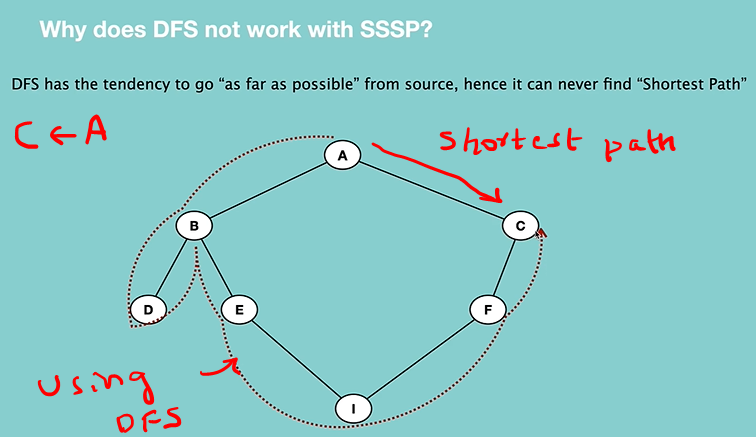

# Dijkstra's Algorithm for SSSP
> # For Weighted Graph

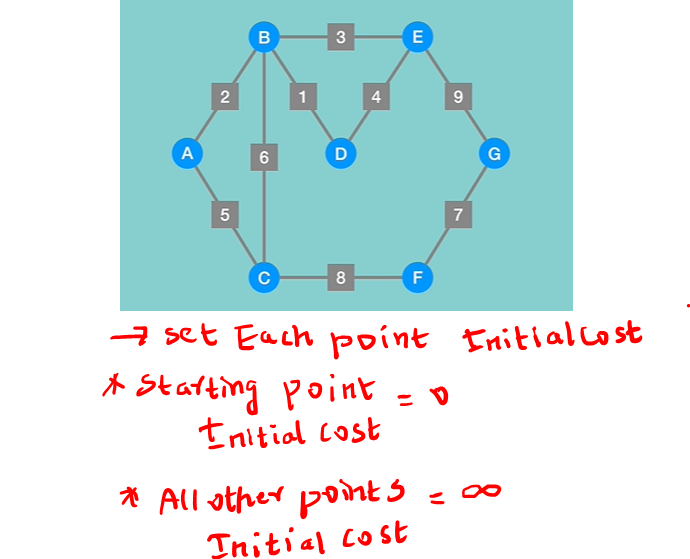

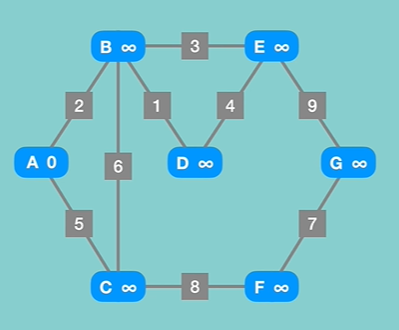

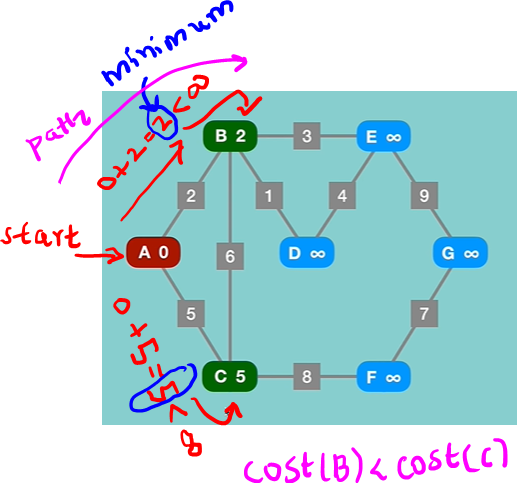

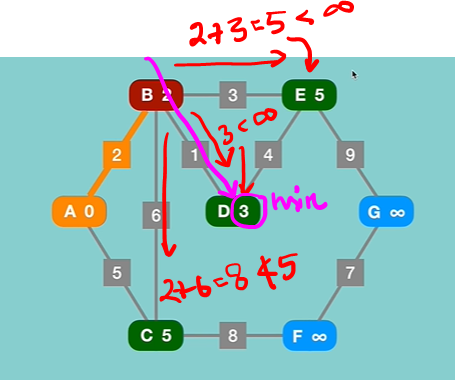

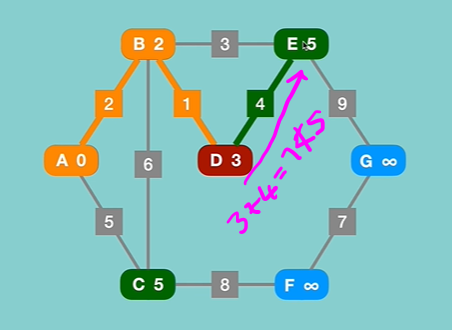

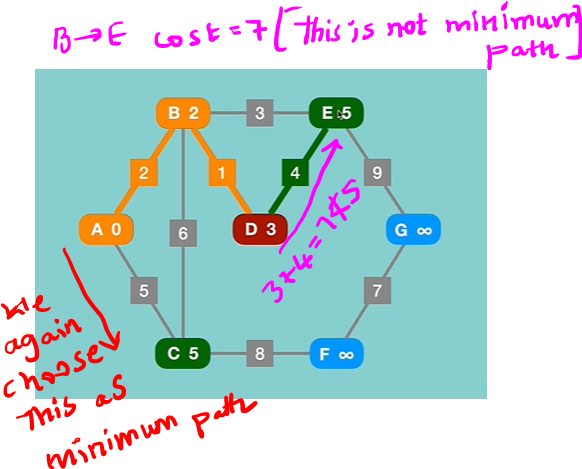

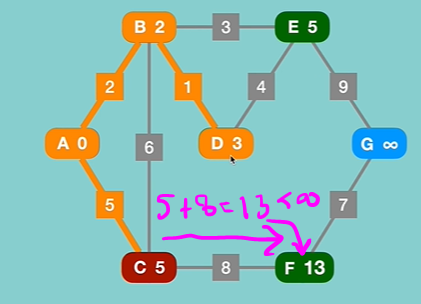

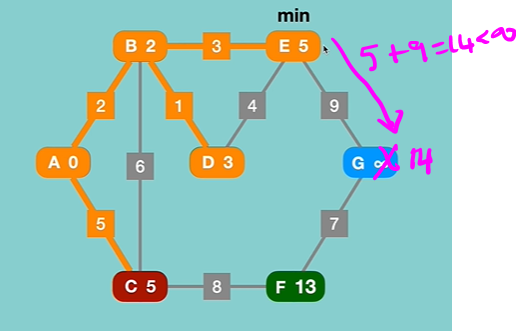

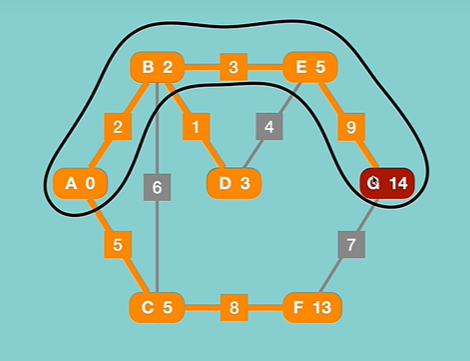

### Time Complexity :: $O(V^2)$
### Space Complexity :: $O(E)$

In [38]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.nodes = set()
        self.edges = defaultdict(list)
        self.distances = {}
    
    def addNode(self,value):
        self.nodes.add(value)
    
    def addEdge(self, fromNode, toNode, distance):
        self.edges[fromNode].append(toNode)
        self.distances[(fromNode, toNode)] = distance


def dijkstra(graph, initial):
    visited = {initial : 0}
    path = defaultdict(list)

    nodes = set(graph.nodes)

    while nodes:
        minNode = None
        for node in nodes:
            if node in visited:
                if minNode is None:
                    minNode = node
                elif visited[node] < visited[minNode]:
                    minNode = node
        if minNode is None:
            break

        nodes.remove(minNode)
        currentWeight = visited[minNode]

        for edge in graph.edges[minNode]:
            weight = currentWeight + graph.distances[(minNode, edge)]
            if edge not in visited or weight < visited[edge]:
                visited[edge] = weight
                path[edge].append(minNode)
    
    return visited, path



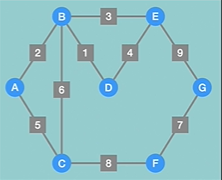

In [39]:
customGraph = Graph()
customGraph.addNode("A")
customGraph.addNode("B")
customGraph.addNode("C")
customGraph.addNode("D")
customGraph.addNode("E")
customGraph.addNode("F")
customGraph.addNode("G")
customGraph.addEdge("A", "B", 2)
customGraph.addEdge("A", "C", 5)
customGraph.addEdge("B", "C", 6)
customGraph.addEdge("B", "D", 1)
customGraph.addEdge("B", "E", 3)
customGraph.addEdge("C", "F", 8)
customGraph.addEdge("D", "E", 4)
customGraph.addEdge("E", "G", 9)
customGraph.addEdge("F", "G", 7)

print(dijkstra(customGraph, "A"))

({'A': 0, 'B': 2, 'C': 5, 'D': 3, 'E': 5, 'F': 13, 'G': 14}, defaultdict(<class 'list'>, {'B': ['A'], 'C': ['A'], 'D': ['B'], 'E': ['B'], 'F': ['C'], 'G': ['E']}))


# Why Dijkstra's Algorithm Doesn't work when have negitive cycle
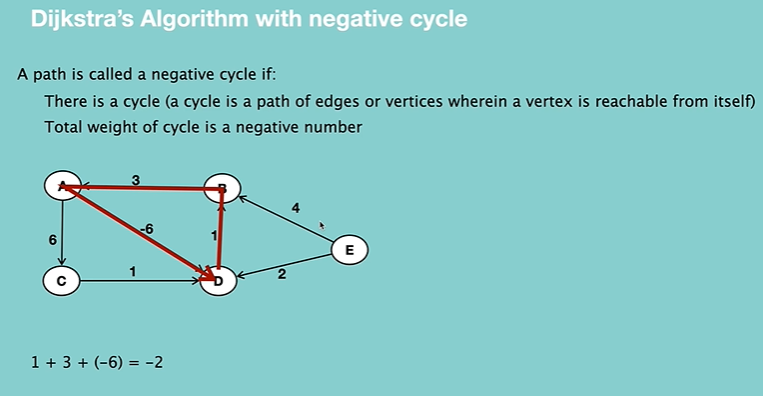

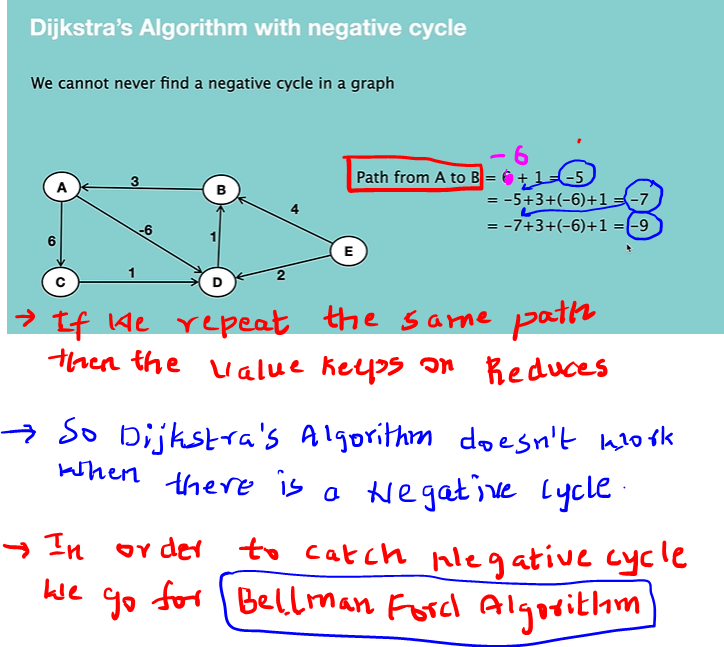

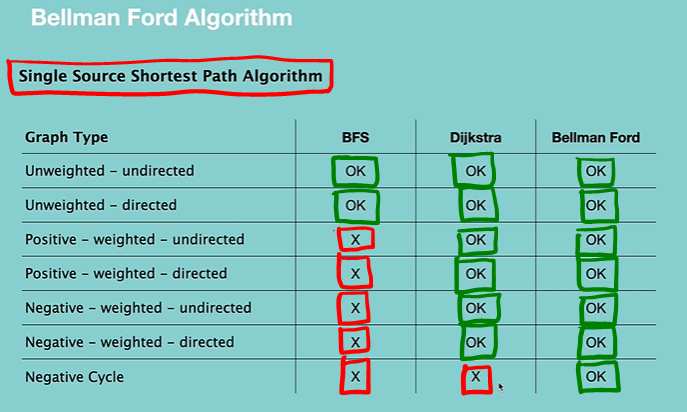

# Bellmann Ford Algorithm
> # Run the Algorithm for $(V-1)$ iterations

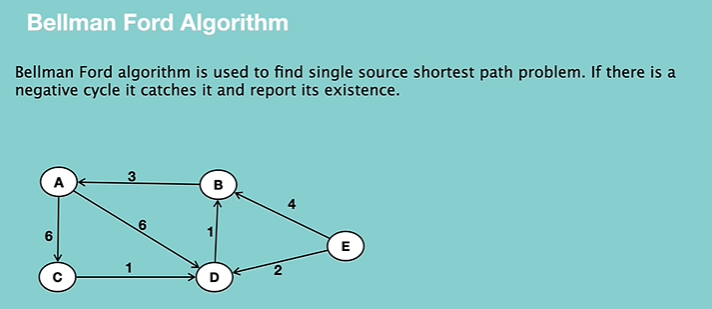

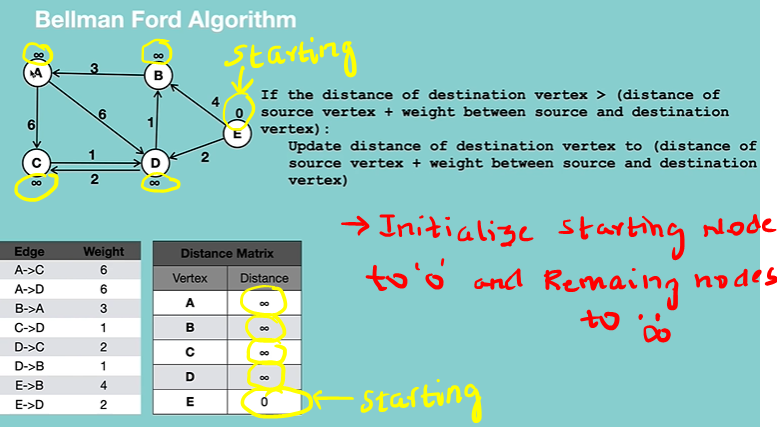

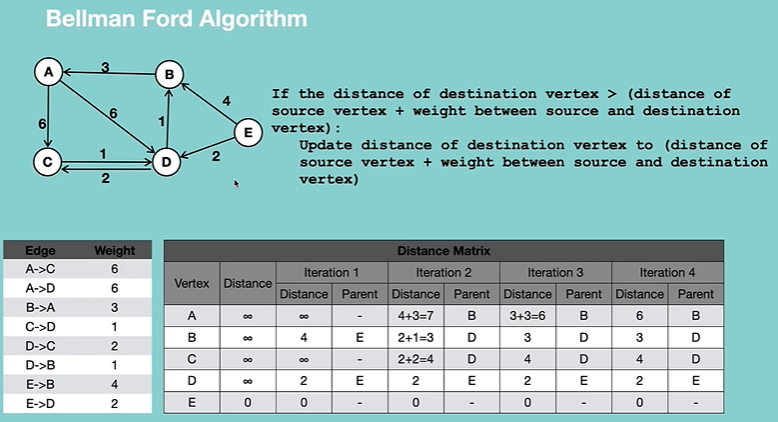

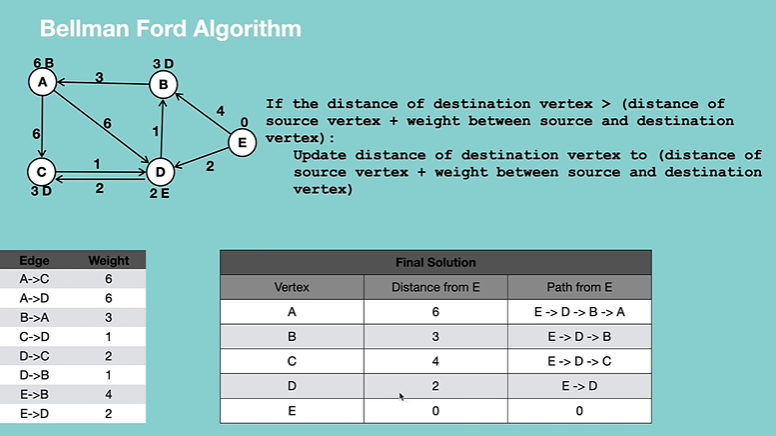

# Bellman Ford with Negative Cycle
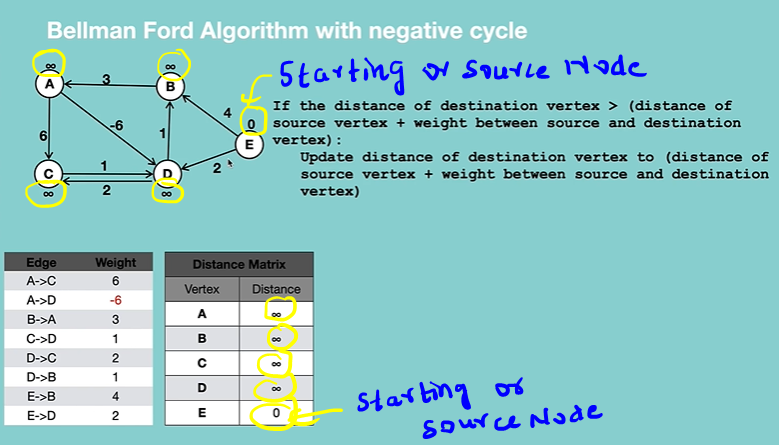

> # Till $(V-1)$ iterations

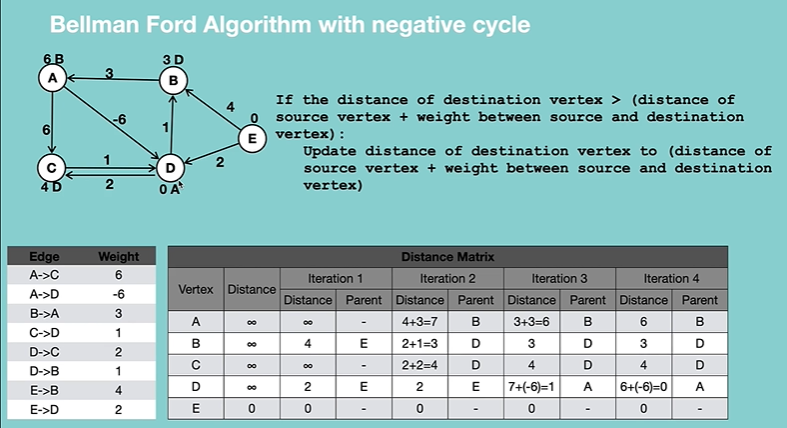

> # If we run $V^{th}$ iteration

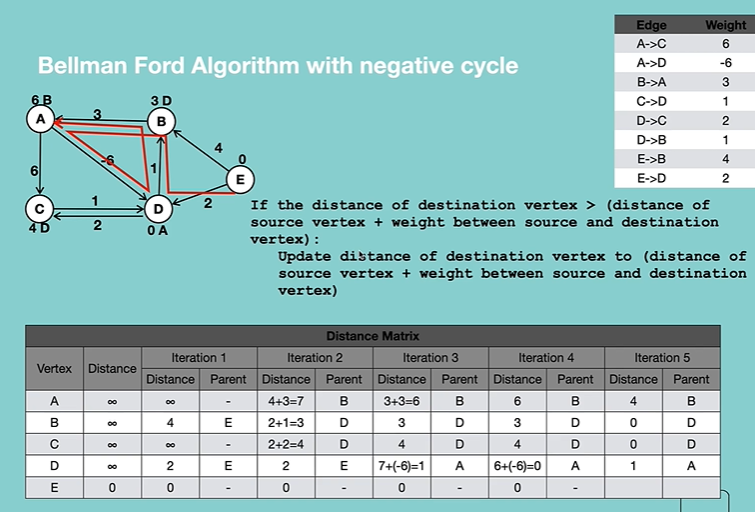

> # So the soultion obtained after $(V-1)$ iterations

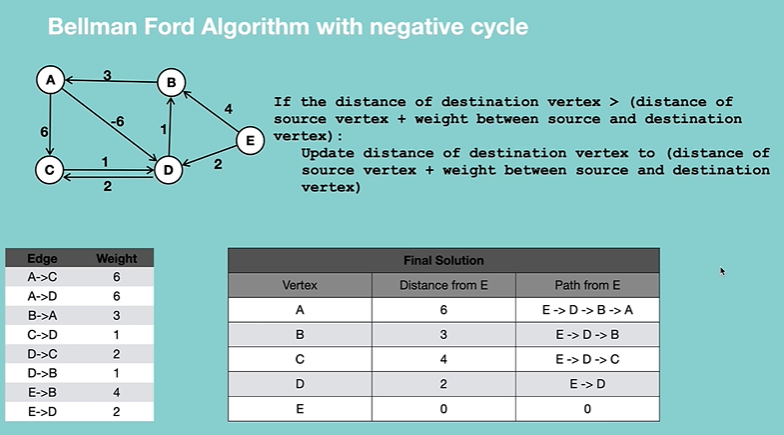

# Why does Bellman Ford run $(V-1)$ iterations ?
> ## Because Bellman Ford ALgorithm Catches Negative Cycle in $(V^{th})$ iteration .SO we need to run it till $(V-1)$ iterations 

# Why does Bellman Ford ALgorithm Catches Negative Cycle in $(V^{th})$ iteration?

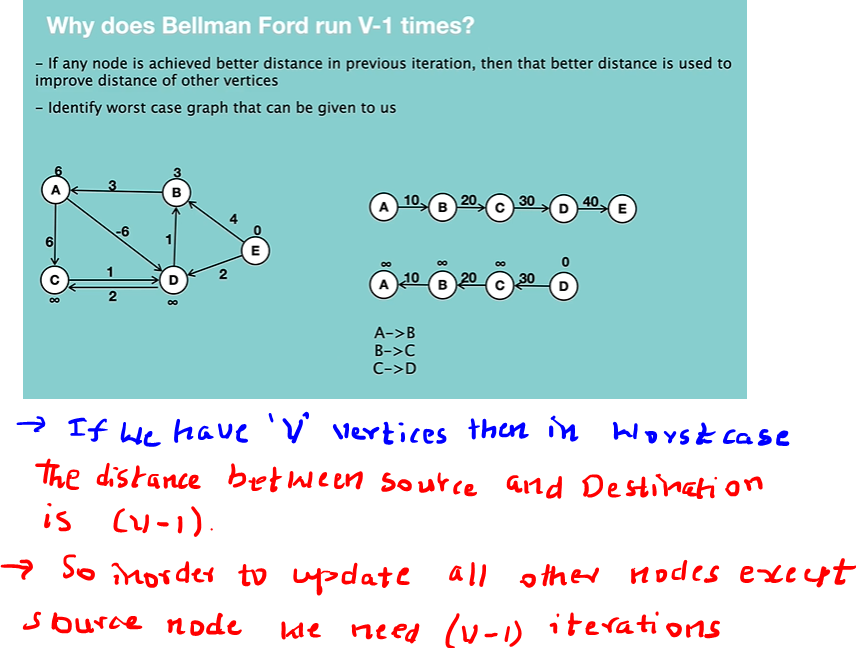
### Time Complexity :: $O(E*V)$
### Space Complexity :: $O(V)$

In [40]:
class Graph:

    def __init__(self, vertices):
        self.V = vertices   
        self.graph = []     
        self.nodes = []

    def add_edge(self, s, d, w):
        self.graph.append([s, d, w])
    
    def addNode(self,value):
        self.nodes.append(value)

    def print_solution(self, dist):
        print("Vertex Distance from Source")
        for key, value in dist.items():
            print('  ' + key, ' :    ', value)
    
    def bellmanFord(self, src):
        dist = {i : float("Inf") for i in self.nodes}
        dist[src] = 0

        for _ in range(self.V-1):
            for s, d, w in self.graph:
                if dist[s] != float("Inf") and dist[s] + w < dist[d]:
                    dist[d] = dist[s] + w
        
        for s, d, w in self.graph:
            if dist[s] != float("Inf") and dist[s] + w < dist[d]:
                print("Graph contains negative cycle")
                return
        

        self.print_solution(dist)

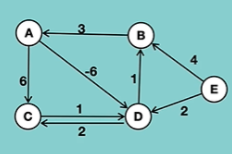

In [41]:
g = Graph(5)
g.addNode("A")
g.addNode("B")
g.addNode("C")
g.addNode("D")
g.addNode("E")
g.add_edge("A", "C", 6)
g.add_edge("A", "D", 6)
g.add_edge("B", "A", 3)
g.add_edge("C", "D", 1)
g.add_edge("D", "C", 2)
g.add_edge("D", "B", 1)
g.add_edge("E", "B", 4)
g.add_edge("E", "D", 2)
g.bellmanFord("E")

Vertex Distance from Source
  A  :     6
  B  :     3
  C  :     4
  D  :     2
  E  :     0


> # BFS vs Dijkstras vs Bellman Ford

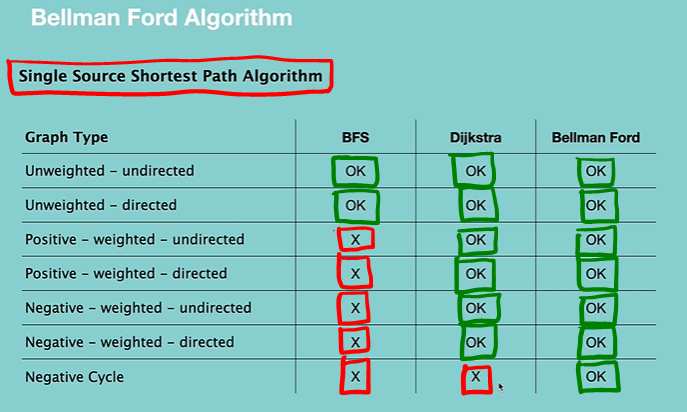

# If we Bellman Ford is working with all the cases, Then why are Learning BFS and Dijkstras ?
> ## If time complexity is concern we can use BFS or Dijkstras

> ## For ease of implementation we can use BFS

> ## When we have Negative Cycle we need to use Bellman Ford

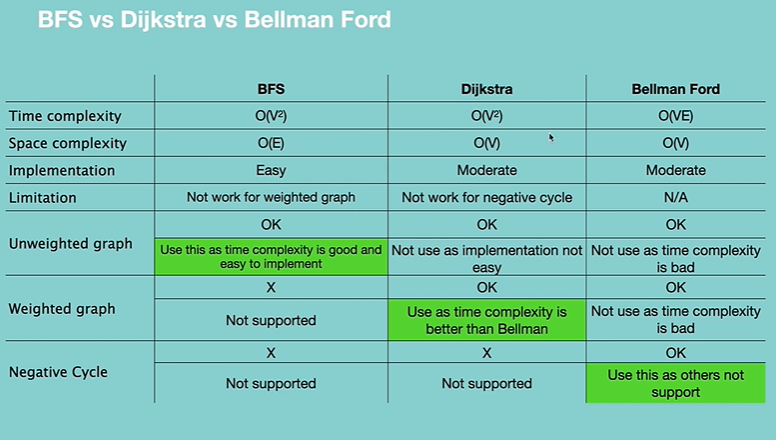